For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). 

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

#### Question 1
Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? 

In [3]:
params = {
    'year' : 2016,
    'query_text' : 'fire'
}

In [4]:
response = requests.get(endpoint, params = params)
response

<Response [200]>

In [5]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [6]:
res_df = pd.DataFrame(res)
res_df 

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [7]:
max_month = res_df.max()
max_month

month_name     September
year                2016
query_count           47
query_text          fire
dtype: object

Fire was searched 47 times in September, 2016 (the most times for that year)

#### Question 2 
Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 

In [8]:
res1 = requests.get('https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100').json()

In [9]:
len(res1)

1000

In [10]:
params1 = {
    '$where' : 'query_count > 100' 
}

response1 = requests.get(endpoint , params=params1)
response1

<Response [200]>

In [11]:
len(response1.json())

1000

There are 1000 instances when a query term was search more than 100 times in a given month

#### Question 3
Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

In [12]:
params2 = {
    'query_text' : 'codes',
    '$where' : 'query_count > 100'
}

response2 = requests.get(endpoint, params=params2)
response2

<Response [200]>

In [13]:
len(response2.json())

56

There are 56 instances when the term 'codes' was searched more than 100 times in a given month

#### Question 4
Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [20]:
params3 = {
    '$limit' : 43677
}
response3 = requests.get(endpoint, params=params3)
response3

<Response [200]>

In [21]:
full_res = response3.json()
full_res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [32]:
maps_dict = {}

for line in full_res:
    text = line.get('query_text')
    mon_yr = str(line.get('month_name')+', '+line.get('year'))
    count = line.get('query_count')
    if text == 'maps':
       maps_dict[mon_yr] = count

In [64]:
maps_df = pd.DataFrame.from_dict(maps_dict, orient='index')
maps_df = maps_df.reset_index()
maps_df.columns = ['month', 'count']
maps_df['month'] = pd.to_datetime(maps_df['month'])
maps_df = maps_df.sort_values('month')
maps_df

,month,count
0,2014-01-01,97
1,2014-02-01,140
2,2014-03-01,144
3,2014-04-01,152
4,2014-05-01,119
...,...,...
77,2020-11-01,86
78,2020-12-01,113
79,2021-03-01,132
80,2021-04-01,148


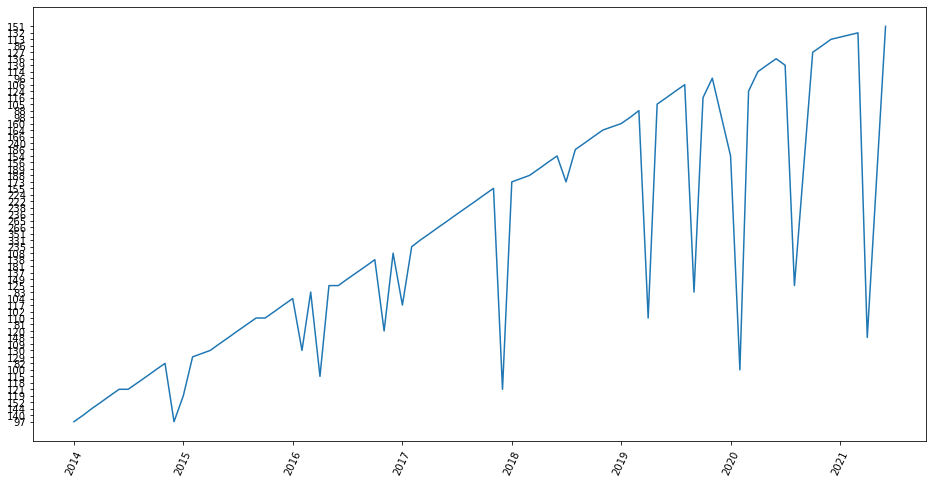

In [66]:
plt.figure(figsize=(16, 8))
plt.plot('month', 'count', data = maps_df)
plt.xticks(rotation = 65);

### Stretch Questions

#### Question 5
Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

#### Question 6
Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets. 

### Bonus

#### Question 7
Socrata is used by many cities, states, and federal organizations. Find additional datasets through [Socrata's Open Data Network](http://www.opendatanetwork.com/) and do an analysis comparing them to Nashville or each other.